In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pickle
import warnings
warnings.filterwarnings("ignore")


# Load the Dataset
df = pd.read_csv('/content/Salary_Data.csv')  # Adjust path if needed
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())


First 5 rows:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701

In [ ]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows: ", df.duplicated().sum())


Missing Values:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64
Duplicate Rows:  4912


In [ ]:
# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

import pickle

# Save each LabelEncoder separately
for col, le in label_encoders.items():
    with open(f"{col}_encoder.pkl", "wb") as f:
        pickle.dump(le, f)


In [ ]:
# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    df = remove_outliers(df, col)

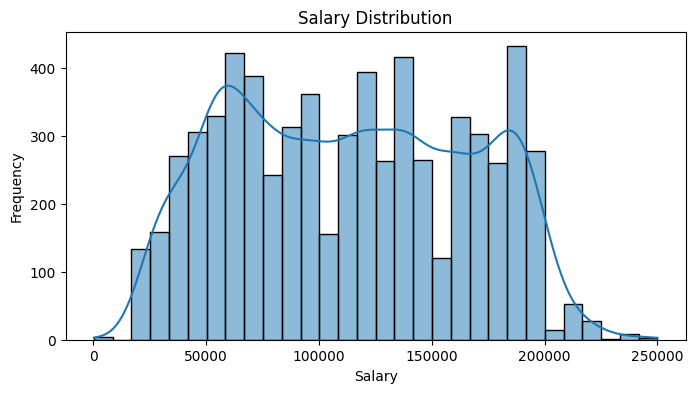

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,177,5.0,90000.0
1,28.0,0,3,18,3.0,65000.0
2,45.0,1,5,145,15.0,150000.0
3,36.0,0,0,116,7.0,60000.0
4,52.0,1,3,26,20.0,200000.0


In [ ]:
df.shape

(6551, 6)

In [ ]:
X = df.drop('Salary', axis=1)  # Change 'Salary' to your actual target column
y = df['Salary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
# salary classes (Low, Medium, High)
df['Salary_Class'] = pd.qcut(df['Salary'], q=3, labels=[0, 1, 2])  # Change to 'low', 'medium', 'high' if needed


Logistic Regression: Accuracy = 0.1602
Naive Bayes: Accuracy = 0.2136
Support Vector Machine: Accuracy = 0.3410
K-Nearest Neighbors: Accuracy = 0.6842
Decision Tree: Accuracy = 0.7727
Random Forest: Accuracy = 0.7796
Bagging: Accuracy = 0.7849
AdaBoost: Accuracy = 0.0625
Gradient Boosting: Accuracy = 0.0313
Extra Trees: Accuracy = 0.7811
Neural Network: Accuracy = 0.6377


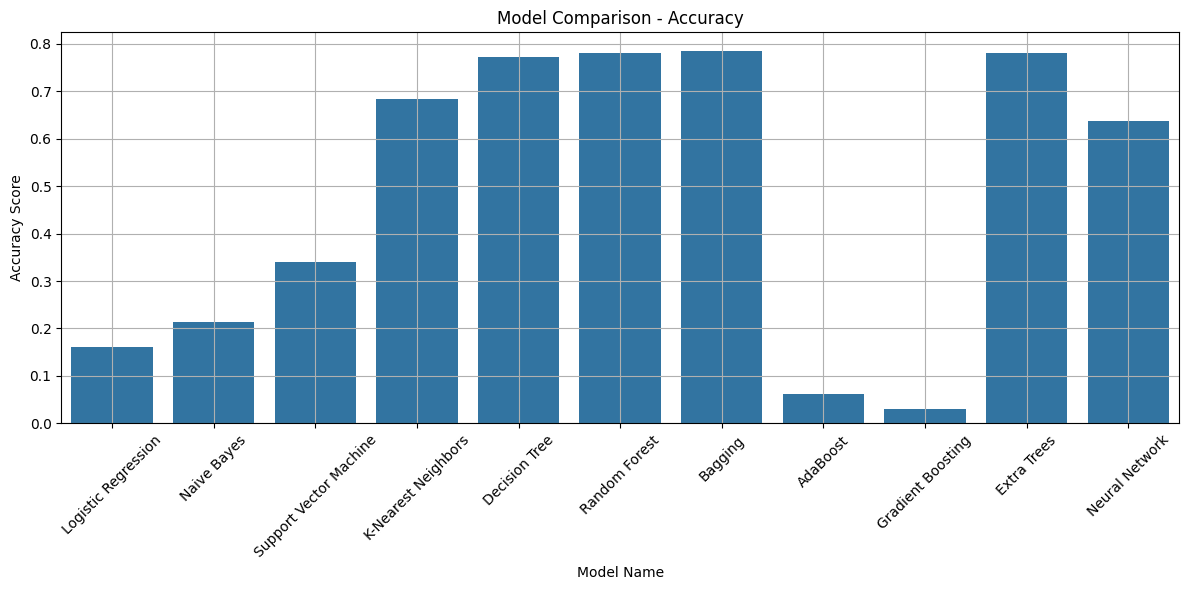

In [ ]:
# Train Multiple Models and Compare Accuracies
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Neural Network': MLPClassifier(max_iter=2000)
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")

# Plot Model Accuracies
plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()))
plt.xticks(rotation=45)
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy Score")
plt.xlabel("Model Name")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:

# Train Final Model (Bagging)
final_model = BaggingClassifier()
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)
final_acc = accuracy_score(y_test, final_pred)
print(f"\n✅ Final BaggingClassifier Accuracy: {final_acc:.4f}")


✅ Final BaggingClassifier Accuracy: 0.7735


In [ ]:
# Save Model and Scaler
with open('salary_bagging_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
print(df['Gender'].max())

2
